## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [3]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25,0.5,0.9]
layers = [[512, 256, 128],[512, 256, 128, 64],[512, 256, 128, 64, 32]]

In [18]:
from keras.layers import Dropout
results = {}

for dp, layer in itertools.product(Dropout_EXP,layers):
    model = build_mlp(input_shape=x_train.shape[1:],num_neurons=layer, drp_ratio=dp)
    
    print(f"Experiment with Dropout ratio = {dp} , layers = {layer}")
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"Dropout ratio = {dp} , layers = {layer}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ratio = 0.25 , layers = [512, 256, 128]
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0966 - accuracy: 0.2245 - val_loss: 1.8657 - val_accuracy: 0.3331
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8787 - accuracy: 0.3154 - val_loss: 1.7740 - val_accuracy: 0.3625
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8305 - accuracy: 0.3381 - val_loss: 1.7080 - val_accuracy: 0.3921
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7910 - accuracy: 0.3525 - val_loss: 1.7029 - val_accuracy: 0.3853
Epoch 5/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7527 - accuracy: 0.3641 - val_loss: 1.6649 - val_accuracy: 0.4050
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7396 - accuracy: 0.3684 - val_loss: 1.6127 - val_accuracy: 0.4263
Epoc

Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8370 - accuracy: 0.3262 - val_loss: 1.7311 - val_accuracy: 0.3884
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8115 - accuracy: 0.3427 - val_loss: 1.7217 - val_accuracy: 0.3832
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7885 - accuracy: 0.3500 - val_loss: 1.7010 - val_accuracy: 0.3946
Epoch 8/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7775 - accuracy: 0.3572 - val_loss: 1.6983 - val_accuracy: 0.4043
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7656 - accuracy: 0.3626 - val_loss: 1.7098 - val_accuracy: 0.3916
Epoch 10/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7461 - accuracy: 0.3697 - val_loss: 1.6587 - val_accuracy: 0.4123
Epoch 11/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7286 - accuracy: 0.3777 - val_loss:

Epoch 14/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0004 - accuracy: 0.2406 - val_loss: 1.9881 - val_accuracy: 0.2604
Epoch 15/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9935 - accuracy: 0.2440 - val_loss: 1.9768 - val_accuracy: 0.2608
Epoch 16/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.9883 - accuracy: 0.2460 - val_loss: 1.9742 - val_accuracy: 0.2698
Epoch 17/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9770 - accuracy: 0.2497 - val_loss: 1.9765 - val_accuracy: 0.2811
Epoch 18/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9788 - accuracy: 0.2492 - val_loss: 2.0187 - val_accuracy: 0.2430
Epoch 19/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9816 - accuracy: 0.2482 - val_loss: 2.0041 - val_accuracy: 0.2674
Epoch 20/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9763 - accuracy: 0.2516 - val_

Epoch 23/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1301 - accuracy: 0.1672 - val_loss: 2.2296 - val_accuracy: 0.1273
Epoch 24/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1219 - accuracy: 0.1720 - val_loss: 2.2203 - val_accuracy: 0.1294
Epoch 25/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1312 - accuracy: 0.1683 - val_loss: 2.2105 - val_accuracy: 0.1323
Epoch 26/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1285 - accuracy: 0.1691 - val_loss: 2.2209 - val_accuracy: 0.1270
Epoch 27/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1273 - accuracy: 0.1672 - val_loss: 2.1995 - val_accuracy: 0.1349
Epoch 28/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1287 - accuracy: 0.1675 - val_loss: 2.2183 - val_accuracy: 0.1325
Epoch 29/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.1226 - accuracy: 0.1683 - val_

50000/50000 [==============================] - 4s 79us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026

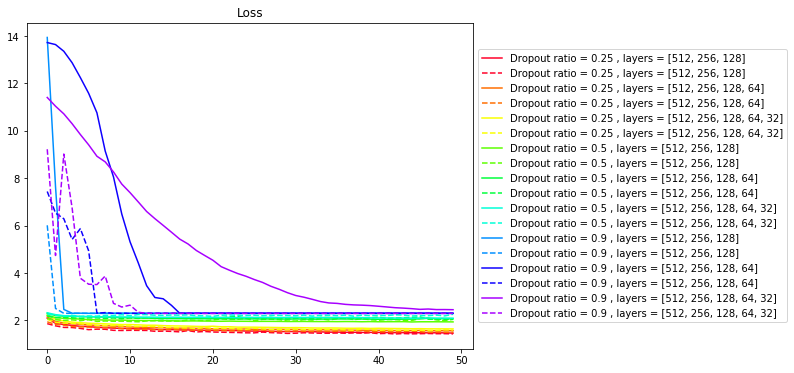

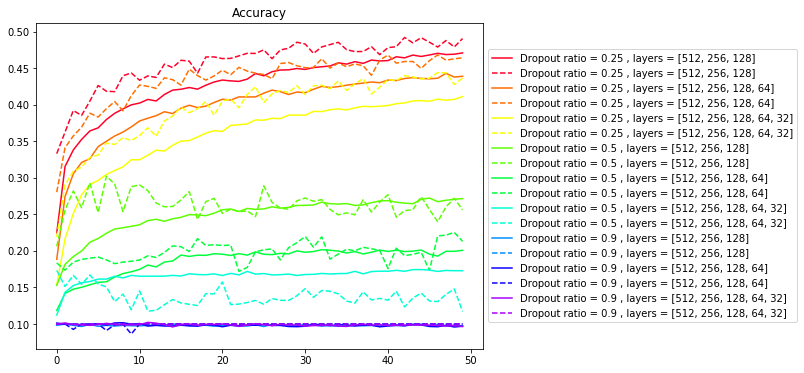

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [19]:
3+1

4